In [71]:
import importlib
import numpy as np
import argparse
import pickle
import os
import pandas as pd
import plotnine

import sys
sys.path.append('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/')

from v1_chains import IncDFCreator, increaseIncDF_binSize
import v1_chains
from utils import flatten

from incidenceToProjection import makeHiC_fromInc

import chains

In [2]:
number = '167'
a = "%05d%s" % (int(number),".pts")
print(a)

00167.pts


In [131]:
dataDir = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_hypergraphSimulations/getMultiwayInteractions_fromBPChains/v3.multiwayConstraints'
inputDir = f'{dataDir}/inputData/'

chainDir = 'cell_1_10000_chains_reconstructed_800/'
outDir = 'cell1_output/'

In [132]:
int1 = [[1,20,30], [5,9,15], [1,22,35,49], [5,11,20,25,40]]
int2 = [[10,20,30], [30,43,50], [10,15,23,35,43,50]]

In [83]:
## Taking from Carlos
from scipy.spatial.distance import cdist

def chain_from_file(df):
    """Given x,y,z coordinates of chains, read into array"""
    x = df[df.columns[0]] #takes first column of the df
    y = df[df.columns[1]] #similarly for the second column
    z = df[df.columns[2]] #similarly for the third column
    a = [np.array([x[i], y[i], z[i]]) for i in range(len(x))] #get all the coordinates of the monomers and store them in a list
    return a

def distMat_from_chains(chain):
    """Given an array of coordinates, convert into df and 
    find pairwise distances"""
    df = pd.DataFrame(chain)
    distances = cdist(df, df)
    return distances

## Me from here

def interactionsFromDistMat(arr, cutoff):
    """ Identify interactions based on min dist """
    df = pd.DataFrame(arr.copy())
    df[df <= cutoff] = 1
    df[df > cutoff] = 0
    return(df)

def getSliceMax(arr,ixList):
    """Given an input list of known multiway interactions,
    get max of the subset df"""
    subsetArr = distMat[np.ix_(ixList,ixList)]
    mVal = subsetArr.max()
    return(mVal)

def surveyDistMat(arr,multiwayUniv):
    """ Given a distance matrix, find out which
    multiway reads that are known and interersting
    are present and record max distance between multiway
    interaction"""
    maxDists = [getSliceMax(arr,interaction) for interaction in multiwayUniv]
    return(maxDists)

def checkAllMultiwayLists(arr,listOfMultiwayInts, cutoff):
    maxDists = [surveyDistMat(arr,multiwayUniv) for multiwayUniv in listOfMultiwayInts]
    trueIntStatus = [int(any([x <= cutoff for x in mD])) for mD in maxDists]
    maxVals = flatten(maxDists)
    maxVals.extend(trueIntStatus)
    return(maxVals)

In [36]:
file_name = '01047.pts'
df = pd.read_csv(os.path.join(inputDir,chainDir, file_name), sep="\s+", comment="#", header=None)

In [37]:
chain = chain_from_file(df)
distMat = distMat_from_chains(chain)
intMat = interactionsFromDistMat(distMat, 100)

In [123]:
# import glob
# import random

# distPattern = '*.pts'
# matching_files = glob.glob(f'{inputDir}/{chainDir}/{distPattern}')
# random.seed(10)
# sampleSize = 500

# runThroughLL = []

# for fName in random.sample(matching_files,sampleSize):
#     df = pd.read_csv(fName, sep="\s+", comment="#", header=None)
#     chain = chain_from_file(df)
#     distMat = distMat_from_chains(chain)
#     listOfMultiwayInts = [int1,int2]
#     cutoff = 200
#     mvList = checkAllMultiwayLists(distMat,listOfMultiwayInts, cutoff)
#     runThroughLL.append(mvList)

# colNames = flatten([['Cell1_'+x for x in ['Inter' + str(ix) for ix in range(len(int1))]],
#     ['Cell2_'+x for x in ['Inter' + str(ix) for ix in range(len(int2))]],
#     ['Cell1_Status','Cell2_Status']])

# summaryDF = pd.DataFrame(runThroughLL, columns = colNames)

In [133]:
## systematic, not random
fileNum = 1000
runThroughLL = []

for i in range(1,fileNum):
    f_id = "%05d%s" % (i,".pts")
    fName = f'{inputDir}/{chainDir}/{f_id}'
    df = pd.read_csv(fName, sep="\s+", comment="#", header=None)
    chain = chain_from_file(df)
    distMat = distMat_from_chains(chain)
    listOfMultiwayInts = [int1,int2]
    cutoff = 200
    mvList = checkAllMultiwayLists(distMat,listOfMultiwayInts, cutoff)
    mvList.insert(0,i)
    runThroughLL.append(mvList)


colNames = flatten([['fileID'],['Cell1_'+x for x in ['Inter' + str(ix) for ix in range(len(int1))]],
    ['Cell2_'+x for x in ['Inter' + str(ix) for ix in range(len(int2))]],
    ['Cell1_Status','Cell2_Status']])

summaryDF = pd.DataFrame(runThroughLL, columns = colNames)

In [135]:
summaryDF.to_csv(f'{dataDir}/cell1_summaryDF_maxDists.csv',index=False)

In [14]:
importlib.reload(v1_chains)

<module 'v1_chains' from '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/v0.analysis/scripts/pythonScripts/functions/v1_chains.py'>

In [18]:
creator = v1_chains.IncDFCreator(4, 150, 300, 1)

In [19]:
print(distMat.shape)
df = pd.DataFrame(distMat)
# A = creator.preprocessMat(df)
# B = creator.perRow((A[0],4))

(51, 51)


In [20]:
for mult in int1:
    print(mult)
    print(distMat[np.ix_(mult, mult)])
    print("")

[1, 20, 30]
[[  0.         166.16061739 310.9596747 ]
 [166.16061739   0.         232.17207152]
 [310.9596747  232.17207152   0.        ]]

[5, 9, 15]
[[  0.         149.42605594 107.09991273]
 [149.42605594   0.         195.66860586]
 [107.09991273 195.66860586   0.        ]]

[1, 22, 35, 49]
[[  0.         239.62494031 216.06228593 258.36512907]
 [239.62494031   0.         148.53602553 109.600942  ]
 [216.06228593 148.53602553   0.         135.34273594]
 [258.36512907 109.600942   135.34273594   0.        ]]

[5, 11, 20, 25, 40]
[[  0.         171.42621595 117.359577   311.94512121 130.16517455]
 [171.42621595   0.         217.24671225 379.49515865 253.09969743]
 [117.359577   217.24671225   0.         208.9920596   60.92373944]
 [311.94512121 379.49515865 208.9920596    0.         188.38615445]
 [130.16517455 253.09969743  60.92373944 188.38615445   0.        ]]



In [44]:
print(distMat[np.ix_([22, 24, 39, 41, 43],[22, 24, 39, 41, 43])])

[[  0.          30.86462371  70.06896179  70.06896179  77.97795819]
 [ 30.86462371   0.          93.83519399  93.83519399 100.57071161]
 [ 70.06896179  93.83519399   0.           0.          17.59649148]
 [ 70.06896179  93.83519399   0.           0.          17.59649148]
 [ 77.97795819 100.57071161  17.59649148  17.59649148   0.        ]]


In [21]:
oneIter = creator.makeIncDF_fromChainDists_single(distMat)

In [22]:
exChain = oneIter[0]
ratios = oneIter[1]

In [23]:
numReads = exChain.shape[1]
print(numReads)
card = exChain.sum()
maxCard = card.max(0)
print(maxCard)

227856
15.0


In [24]:
exChain.index = ["Bin"+str(i) for i in exChain.index]

In [13]:
# def dfToDict(df,result_dict):
#     """Takes in an incidence DF and converts to 
#     a dictionary of hyperedges"""
#     for col in df.columns:
#         indices = df.index[df[col] == 1].tolist()
#         key = '_'.join(indices)
#         result_dict[key] = result_dict.get(key, 0) + 1
#     return(result_dict)

# inc_dict = {}
# inc_dict = dfToDict(df,inc_dict)

In [42]:
A = exChain.iloc[0:10,0:10]
print(exChain.shape)
print(len(ratios))
print(ratios[0:10])
# inc_dict = {}
# inc_dict = v1_chains.dfToDict(A,inc_dict)
# inc_dict

(51, 227856)
227856
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [25]:
inc_dict = {}
inc_dict = chains.dfToDict(exChain,inc_dict)

iDF = chains.dictToDF(inc_dict)

In [26]:
A = ["_".join(["Bin"+str(j) for j in i]) for i in int1]
B = ["_".join(["Bin"+str(j) for j in i]) for i in int2]

In [27]:
print([x in inc_dict for x in A])
print([x in inc_dict for x in B])

[False, True, False, False]
[False, False, False]


In [3]:
file_path = os.path.join(dataDir,outDir, 'incDict_1_150_300_1044.pkl')
with open(file_path,'rb') as f:
    genDict = pickle.load(f)


In [15]:
final_result_dict = {}
final_result_dict = v1_chains.combineChunkedDicts(genDict,final_result_dict)

### Read in generated pkl files and plot

In [48]:
pklDir = 'cell1_output/'
i = 1050
filePath = f'{dataDir}/{pklDir}/incDF_1_110_300_{i}.pkl'
f = pd.read_pickle(filePath)
print(f.iloc[0:10,0:10])
f.shape

(51, 89135)

In [7]:
#gD = chains.dictToDF(genDict)
gD.shape

(49, 213647)

In [8]:
p = makeHiC_fromInc(gD)
p.shape

(49, 49)

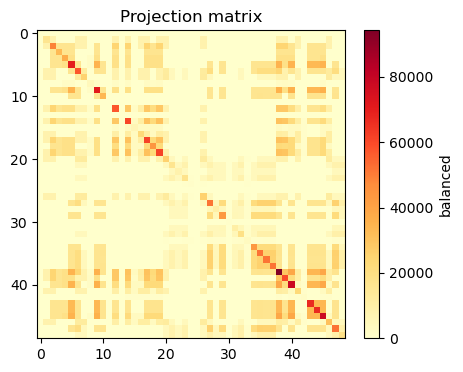

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

plt.figure(figsize=(6, 4))
im = plt.imshow(p, cmap="YlOrRd") #norm = LogNorm(vmax=4*10**4, vmin = 0.01)
plt.colorbar(im, fraction=0.046, pad=0.04, label='balanced');
plt.title("Projection matrix")
plt.show()

In [ ]:
## Read in example file
projMat = None
numFiles = 1000
counter = 0
for i in range(1000,numFiles):
    filePath = f'{dataDir}/{pklDir}/incDF_1_110_300_{i}.pkl'
    if os.path.isfile(filePath):
        counter += 1
        if projMat is None:
            projMat = np.loadtxt(filePath)
        else:
            projMat += np.loadtxt(filePath)
if projMat is not None:
    projMat = projMat.astype('float64')
    projMat /= counter

nrow = projMat.shape[0]